## Q.4

Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats

Importing the dataset and combining 

In [2]:
d_26 = pd.read_csv("2006.csv")
d_27 = pd.read_csv("2007.csv")

In [3]:
combined = pd.concat([d_26, d_27])

In [4]:
import warnings
warnings.filterwarnings("ignore")

Getting an understaning of the dataset

In [5]:
combined.shape

(14595137, 29)

In [6]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14595137 entries, 0 to 7453214
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay     

Converting CRSDepTIme to Date-Time Format

In [7]:
Day1 = combined.DayofMonth.astype(str).str[-2:]
Day1

0          11
1          11
2          11
3          11
4          11
           ..
7453210    15
7453211    15
7453212    15
7453213    15
7453214    15
Name: DayofMonth, Length: 14595137, dtype: object

In [8]:
#Extracting minutes,hours and, days
Min1 = combined.CRSDepTime.astype(str).str[-2:]
Min1

0          45
1          53
2          15
3          55
4          32
           ..
7453210    05
7453211    51
7453212    25
7453213    15
7453214    00
Name: CRSDepTime, Length: 14595137, dtype: object

In [9]:
Hr= combined.CRSDepTime.astype(str).str[:-2]
Hr

0           7
1          10
2          19
3          17
4           8
           ..
7453210    16
7453211    18
7453212    10
7453213    13
7453214    18
Name: CRSDepTime, Length: 14595137, dtype: object

In [10]:
Hr[Hr == ""] = "0"

Converting into datetime format

In [11]:
combined["DTCRSDepTime"] = pd.to_datetime(
            Day1.astype(str) + "/" + combined.Month.astype(str) + "/" + combined.Year.astype(str) + "," + Hr + ":" + Min1, 
            format='%d/%m/%Y,%H:%M')
combined["DTCRSDepTime"]

0         2006-01-11 07:45:00
1         2006-01-11 10:53:00
2         2006-01-11 19:15:00
3         2006-01-11 17:55:00
4         2006-01-11 08:32:00
                  ...        
7453210   2007-12-15 16:05:00
7453211   2007-12-15 18:51:00
7453212   2007-12-15 10:25:00
7453213   2007-12-15 13:15:00
7453214   2007-12-15 18:00:00
Name: DTCRSDepTime, Length: 14595137, dtype: datetime64[ns]

Sorting the dataset according to CRSDeptime

In [12]:
combined = combined.sort_values(["TailNum", "DTCRSDepTime"]).set_index("DTCRSDepTime")

Grouping them using Tailnumber variable according to the order of time

In [13]:
combined = combined.reset_index()

In [14]:
combined

,DTCRSDepTime,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006-01-01 06:08:00,2006,1,1,7,NaN,608,NaN,919,OO,...,0,0,1,A,0,0,0,0,0,0
1,2006-01-01 06:30:00,2006,1,1,7,NaN,630,NaN,740,US,...,0,0,1,A,0,0,0,0,0,0
2,2006-01-01 06:40:00,2006,1,1,7,NaN,640,NaN,725,OO,...,0,0,1,A,0,0,0,0,0,0
3,2006-01-01 06:43:00,2006,1,1,7,NaN,643,NaN,920,OO,...,0,0,1,A,0,0,0,0,0,0
4,2006-01-01 06:50:00,2006,1,1,7,NaN,650,NaN,817,XE,...,0,0,1,B,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14595132,2007-03-16 20:40:00,2007,3,16,5,NaN,2040,NaN,2210,XE,...,0,0,1,A,0,0,0,0,0,0
14595133,2007-03-17 08:05:00,2007,3,17,6,NaN,805,NaN,945,XE,...,0,0,1,B,0,0,0,0,0,0
14595134,2007-03-17 08:25:00,2007,3,17,6,NaN,825,NaN,1010,XE,...,0,0,1,B,0,0,0,0,0,0
14595135,2007-03-17 09:00:00,2007,3,17,6,NaN,900,NaN,1035,XE,...,0,0,1,B,0,0,0,0,0,0


In [24]:
combined = combined[(combined['ArrDelay']>=0)]

In [16]:
combined = combined.sort_values(["TailNum","DTCRSDepTime"]).set_index("DTCRSDepTime")

Defining the new variable which is the sum of both Arrival and Departure delays

In [29]:
combined["TotalCDelay"] = combined.ArrDelay + combined.DepDelay

Lagging the current delay with one time period inorder to find previous delays

In [30]:
combined["Delay1"] =combined["ArrDelay"].shift(periods=1)

Finding the correlation between Total Current Delay and Delay1(Previous delay)

In [31]:
combined.reset_index()

,DTCRSDepTime,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalC.Delay,Delay1,TotalC.Delay1,Delay11,TotalCDelay
0,2006-01-01 19:45:00,2006,1,1,7,2036.0,1945,2341.0,2315,B6,...,8,0,0,0,18,77.0,NaN,1,0,77.0
1,2006-01-02 19:45:00,2006,1,2,1,2036.0,1945,1205.0,2315,B6,...,0,0,726,0,44,821.0,26.0,1,1,821.0
2,2006-01-02 20:05:00,2006,1,2,1,2145.0,2005,2300.0,2125,OH,...,0,95,0,0,0,195.0,770.0,1,1,195.0
3,2006-01-03 19:45:00,2006,1,3,2,2101.0,1945,2400.0,2315,B6,...,0,0,8,0,37,121.0,95.0,1,1,121.0
4,2006-01-08 20:25:00,2006,1,8,7,2037.0,2025,2135.0,2135,OH,...,0,0,0,0,0,12.0,45.0,1,1,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7089134,2007-12-29 15:50:00,2007,12,29,6,1552.0,1550,1633.0,1632,AQ,...,0,0,0,0,0,3.0,8.0,1,1,3.0
7089135,2007-12-30 14:30:00,2007,12,30,7,1509.0,1430,1827.0,1805,AQ,...,22,0,0,0,0,61.0,1.0,1,1,61.0
7089136,2007-12-30 19:05:00,2007,12,30,7,1958.0,1905,244.0,205,AQ,...,39,0,0,0,0,92.0,22.0,1,1,92.0
7089137,2007-12-31 11:00:00,2007,12,31,1,1130.0,1100,1520.0,1435,AQ,...,45,0,0,0,0,75.0,39.0,1,1,75.0


In [32]:
combined

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalC.Delay,Delay1,TotalC.Delay1,Delay11,TotalCDelay
DTCRSDepTime,,,,,,,,,,,,,,,,,,,,,
2006-01-01 19:45:00,2006,1,1,7,2036.0,1945,2341.0,2315,B6,47,...,8,0,0,0,18,77.0,NaN,1,0,77.0
2006-01-02 19:45:00,2006,1,2,1,2036.0,1945,1205.0,2315,B6,47,...,0,0,726,0,44,821.0,26.0,1,1,821.0
2006-01-02 20:05:00,2006,1,2,1,2145.0,2005,2300.0,2125,OH,5875,...,0,95,0,0,0,195.0,770.0,1,1,195.0
2006-01-03 19:45:00,2006,1,3,2,2101.0,1945,2400.0,2315,B6,47,...,0,0,8,0,37,121.0,95.0,1,1,121.0
2006-01-08 20:25:00,2006,1,8,7,2037.0,2025,2135.0,2135,OH,5508,...,0,0,0,0,0,12.0,45.0,1,1,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-12-29 15:50:00,2007,12,29,6,1552.0,1550,1633.0,1632,AQ,477,...,0,0,0,0,0,3.0,8.0,1,1,3.0
2007-12-30 14:30:00,2007,12,30,7,1509.0,1430,1827.0,1805,AQ,477,...,22,0,0,0,0,61.0,1.0,1,1,61.0
2007-12-30 19:05:00,2007,12,30,7,1958.0,1905,244.0,205,AQ,478,...,39,0,0,0,0,92.0,22.0,1,1,92.0


In [33]:
corr = combined[["Delay1","TotalCDelay"]]
corr_1 = corr.corr('pearson')
corr_1

,Delay1,TotalCDelay
Delay1,1.000000,0.389897
TotalCDelay,0.389897,1.000000


Drawing the scatterplot inorder to find there exists a linear relationship or not

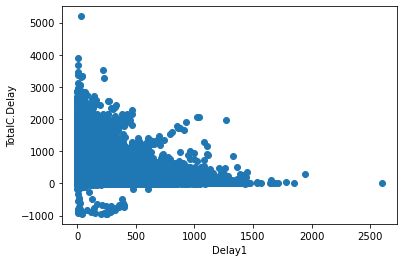

In [34]:
plt.scatter(combined["Delay1"], combined["TotalCDelay"])
plt.xlabel('Delay1')
plt.ylabel('TotalC.Delay')
plt.show()

Encoding the delays, naming them with new variables

In [37]:
combined['TotalCDelay1'] = np.where(combined['TotalCDelay'] > 0, 1, 0)
combined['Delay11'] = np.where(combined['Delay1'] > 0, 1, 0)

Cross Tabulation

In [38]:
combined.reset_index()

,DTCRSDepTime,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalC.Delay,Delay1,TotalC.Delay1,Delay11,TotalCDelay,TotalCDelay1
0,2006-01-01 19:45:00,2006,1,1,7,2036.0,1945,2341.0,2315,B6,...,0,0,0,18,77.0,NaN,1,0,77.0,1
1,2006-01-02 19:45:00,2006,1,2,1,2036.0,1945,1205.0,2315,B6,...,0,726,0,44,821.0,26.0,1,1,821.0,1
2,2006-01-02 20:05:00,2006,1,2,1,2145.0,2005,2300.0,2125,OH,...,95,0,0,0,195.0,770.0,1,1,195.0,1
3,2006-01-03 19:45:00,2006,1,3,2,2101.0,1945,2400.0,2315,B6,...,0,8,0,37,121.0,95.0,1,1,121.0,1
4,2006-01-08 20:25:00,2006,1,8,7,2037.0,2025,2135.0,2135,OH,...,0,0,0,0,12.0,45.0,1,1,12.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7089134,2007-12-29 15:50:00,2007,12,29,6,1552.0,1550,1633.0,1632,AQ,...,0,0,0,0,3.0,8.0,1,1,3.0,1
7089135,2007-12-30 14:30:00,2007,12,30,7,1509.0,1430,1827.0,1805,AQ,...,0,0,0,0,61.0,1.0,1,1,61.0,1
7089136,2007-12-30 19:05:00,2007,12,30,7,1958.0,1905,244.0,205,AQ,...,0,0,0,0,92.0,22.0,1,1,92.0,1
7089137,2007-12-31 11:00:00,2007,12,31,1,1130.0,1100,1520.0,1435,AQ,...,0,0,0,0,75.0,39.0,1,1,75.0,1


In [39]:
Crosstab = pd.crosstab(combined.Delay11, combined.TotalCDelay1, rownames=["Delay1"], colnames=["TotalCDelay1"])
Crosstab 

TotalCDelay1,0,1
Delay1,,
0,88061,350258
1,721234,5929586


In [40]:
devisor = Crosstab.sum(axis=1)
Crosstab = Crosstab.divide(devisor, axis=0)
Crosstab

TotalCDelay1,0,1
Delay1,,
0,0.200906,0.799094
1,0.108443,0.891557


Scatterplot using LateAircraftDelay and ArrDelay variables as x axis and y axis

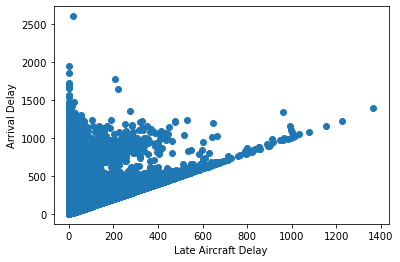

In [41]:
plt.scatter(combined["LateAircraftDelay"], combined["ArrDelay"])
plt.xlabel('Late Aircraft Delay')
plt.ylabel('Arrival Delay')
plt.show()

In [42]:
corr = combined[["LateAircraftDelay","ArrDelay"]]
corr_1 = corr.corr('pearson')
corr_1

,LateAircraftDelay,ArrDelay
LateAircraftDelay,1.000000,0.597186
ArrDelay,0.597186,1.000000
